In [0]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [0]:
seed = 7
np.random.seed(seed)

In [0]:
dataframe = pd.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
le = LabelEncoder()
Y=le.fit_transform(dataset[:,4])

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

one_hot_train_labels=to_categorical(y_train)
one_hot_test_labels=to_categorical(y_test)

x_val=x_train[:25]
partial_x_train=x_train[25:]

y_val=one_hot_train_labels[:25]
partial_y_train=one_hot_train_labels[25:]

In [0]:
def create_baseline():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model

In [0]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=200, batch_size=5, verbose=0)

In [0]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Baseline: 97.33% (3.27%)


In [0]:
def create_small():
    model=Sequential()
    model.add(Dense(4,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model
estimator = KerasClassifier(build_fn=create_small, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 88.00% (25.26%)


In [0]:
def create_large():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model
estimator = KerasClassifier(build_fn=create_large, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 96.00% (3.27%)


In [0]:
def create_overfit():
    model=Sequential()
    model.add(Dense(64,activation='relu',input_shape=(4,)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model
estimator = KerasClassifier(build_fn=create_overfit, epochs=300, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 96.67% (5.37%)


In [0]:
def create_small():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dropout(0.2))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model
estimator = KerasClassifier(build_fn=create_small, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 97.33% (4.42%)


In [0]:
import keras
inputs= keras.Input(shape=(4,))
x=Dense(8,activation='relu')(inputs)
x=Dense(8,activation='relu')(x)
outputs=Dense(3,activation='softmax')(x) 
model=keras.Model(inputs,outputs)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])    
model.fit(partial_x_train,partial_y_train,epochs=100,validation_data=(x_val,y_val))

Train on 75 samples, validate on 25 samples
Epoch 1/100
75/75 [==============================] - 4s 54ms/step - loss: 1.2515 - acc: 0.3333 - val_loss: 1.2126 - val_acc: 0.2800
Epoch 2/100
75/75 [==============================] - 0s 327us/step - loss: 1.2067 - acc: 0.3333 - val_loss: 1.1736 - val_acc: 0.2800
Epoch 3/100
75/75 [==============================] - 0s 301us/step - loss: 1.1751 - acc: 0.3333 - val_loss: 1.1516 - val_acc: 0.2800
Epoch 4/100
75/75 [==============================] - 0s 315us/step - loss: 1.1573 - acc: 0.3333 - val_loss: 1.1375 - val_acc: 0.2800
Epoch 5/100
75/75 [==============================] - 0s 321us/step - loss: 1.1442 - acc: 0.3333 - val_loss: 1.1188 - val_acc: 0.2800
Epoch 6/100
75/75 [==============================] - 0s 428us/step - loss: 1.1280 - acc: 0.3333 - val_loss: 1.1051 - val_acc: 0.2800
Epoch 7/100
75/75 [==============================] - 0s 367us/step - loss: 1.1147 - acc: 0.3333 - val_loss: 1.0927 - val_acc: 0.2800
Epoch 8/100
75/75 [=======

Train on 75 samples, validate on 25 samples
Epoch 1/200
75/75 [==============================] - 4s 54ms/step - loss: 1.2455 - acc: 0.3333 - val_loss: 1.2613 - val_acc: 0.2800
Epoch 2/200
75/75 [==============================] - 0s 409us/step - loss: 1.2078 - acc: 0.3333 - val_loss: 1.2398 - val_acc: 0.2800
Epoch 3/200
75/75 [==============================] - 0s 304us/step - loss: 1.1885 - acc: 0.3333 - val_loss: 1.2206 - val_acc: 0.2800
Epoch 4/200
75/75 [==============================] - 0s 375us/step - loss: 1.1688 - acc: 0.3333 - val_loss: 1.2041 - val_acc: 0.2800
Epoch 5/200
75/75 [==============================] - 0s 360us/step - loss: 1.1531 - acc: 0.3333 - val_loss: 1.1884 - val_acc: 0.2800
Epoch 6/200
75/75 [==============================] - 0s 296us/step - loss: 1.1378 - acc: 0.3333 - val_loss: 1.1772 - val_acc: 0.2800
Epoch 7/200
75/75 [==============================] - 0s 396us/step - loss: 1.1235 - acc: 0.3333 - val_loss: 1.1631 - val_acc: 0.2800
Epoch 8/200
75/75 [=======

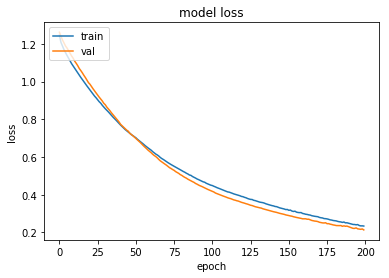

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
class MyModel(keras.Model):
    def __init__(self):
        super(MyModel,self).__init__()
        self.dense1=Dense(8,activation='relu')
        self.dense2=Dense(8,activation='relu')
        self.dense3=Dense(3,activation='softmax')
        
    def call(self,inputs):
        x=self.dense1(inputs)
        x=self.dense2(x)
        return self.dense3(x)
model=MyModel()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])    
history=model.fit(partial_x_train,partial_y_train,epochs=200,validation_data=(x_val,y_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
k=4
num_val_samples=len(X)//k
num_epochs=100
all_scores=[]

def create_model():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model

for i in range(k):
    print('processing fold #', i)
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = dummy_y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X[:i * num_val_samples],X[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([dummy_y[:i * num_val_samples],dummy_y[(i + 1) * num_val_samples:]],axis=0)
    model = create_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
113/113 [==============================] - 4s 38ms/step - loss: 1.2265 - acc: 0.4248
Epoch 2/100
113/113 [==============================] - 1s 5ms/step - loss: 0.9153 - acc: 0.5133
Epoch 3/100
113/113 [==============================] - 1s 5ms/step - loss: 0.8572 - acc: 0.5487
Epoch 4/100
113/113 [==============================] - 1s 5ms/step - loss: 0.8416 - acc: 0.6195
Epoch 5/100
113/113 [==============================] - 1s 5ms/step - loss: 0.8147 - acc: 0.6195
Epoch 6/100
113/113 [==============================] - 1s 5ms/step - loss: 0.7982 - acc: 0.6372
Epoch 7/100
113/113 [==============================] - 1s 5ms/step - loss: 0.7891 - acc: 0.6018
Epoch 8/100
113/113 [==============================] - 1s 5ms/step - loss: 0.7733 - acc: 0.6460
Epoch 9/100
113/113 [==============================] - 1s 5ms/step - loss: 0.7504 - acc: 0.6637
Epoch 10/100
113/113 [==============================] - 1s 5ms/step - loss: 0.7299 - acc: 0.6637
Epoch 11/100
113/1

In [0]:
all_scores
np.mean(all_scores)

0.9256756764811439